In [1]:
import numpy as np;
import matplotlib.pyplot as plt;

def Quasi_Optics(Input,Size=5,F='f1'):
    # input parameters:
    '''
    1.lambda;
    2.W_in;
    3.d_in;
    4.angle(incident angle);
    # next parameters just one of them need to be given.
    5.f(focal length)
    5.dout(distance between output beam waist and mirror center.)
    '''
    #1. read the data from input file.
    #Input=input('Type in the full name of input file');
    
    Para={};
    with open(Input) as File:
        for line in File:
            (key,val,sep)=line.split(',');
            Para[key]=np.asfarray(np.array([val]),float)[0];
    
    Lambda=Para['lambda'];
    angle=Para['angle']/2;
    w_in=Para['W_in'];
    print('win:',w_in);
    d_in=Para['d_in'];
    # beam size
    Theta_beam=np.arctan(Lambda/(np.pi*w_in)); 
    zc=np.pi*w_in**2/Lambda;
    print('half axis of mirror:',Size/2*w_in*np.sqrt(1+(d_in)**2/zc**2))
    
    #2. check which parameter we used.
    if 'f' in  Para.keys():
        f=Para['f'];
        fact1=d_in/f-1;
        fact2=np.pi*w_in**2/(Lambda*f);
        fact2=1/(fact1**2+fact2**2);
        w_out=w_in*np.sqrt(fact2);
        d_out=f*(1+fact1*fact2);
        Rin=d_in+zc**2/d_in;
        zc_out=np.pi*w_out**2/Lambda;
        Rout=d_out+zc_out**2/d_out;
        print('Rin:',Rin,'\n','dout:',d_out,'\n','wout:',w_out,'\n','Rout:',Rout,'\n','dout:',d_out,'\n');
        
    elif 'd_out' in Para.keys():
        d_out=Para['d_out'];
        a=d_out+d_in;
        b=-(d_in**2+zc**2+2*d_in*d_out);
        c=d_out*(zc**2+d_in**2);
        d=b**2-4*a*c;
        
        f1=(-b+np.sqrt(d))/(2*a);
        f2=(-b-np.sqrt(d))/(2*a);
        if F=='f1':
            f=f1;
            fact1=d_in/f-1;
            fact2=np.pi*w_in**2/(Lambda*f);
            fact2=1/(fact1**2+fact2**2);
            w_out=w_in*np.sqrt(fact2);
            zc_out=np.pi*w_out**2/Lambda;
            Rin=d_in+zc**2/d_in;
            print('w',w_in*np.sqrt(1+50**2/zc**2)*2.5)
            Rout=d_out+zc_out**2/d_out;
            print('f1:',f1,'\n','Wout:',w_out,'\n','W_in:',w_in,'\n','R_out:',Rout,'\n','R_in:',Rin,'\n','Conic center:',Rin,'\n','Conic center out:',Rout);
            print('ratio:',Rout/Rin);
        elif F=='f2':
            f=f2;
            fact1=d_in/f-1;
            fact2=np.pi*w_in**2/(Lambda*f);
            fact2=1/(fact1**2+fact2**2);
            w_out=w_in*np.sqrt(fact2);
            zc_out=np.pi*w_out**2/Lambda;
            Rin=d_in+zc**2/d_in;
            Rout=d_out+zc_out**2/d_out;
            print('f2:',f2,'\n','Wout:',w_out,'\n','W_in:',w_in,'\n','R_out:',Rout,'\n','R_in:',Rin,'\n','Conic center:',Rin,'\n','Conic center out:',Rout);
            #print(Rout/Rin);
            
        
    return f,Rin,d_in,Rout,d_out,w_out,angle*2,Theta_beam,Lambda;


def Mirror(focal_length,Rin,Rout,angle,Theta_beam,Size=5,Mirror_type='concave'):
    angle=angle*np.pi/180;
    if Mirror_type=='concave':
        a=np.abs(Rin+Rout)/2;
        b=np.sqrt(Rin*np.abs(Rout)/2*(1+np.cos(angle)));
        c=1/2*np.sqrt(Rin**2+Rout**2+2*Rin*np.abs(Rout)*np.cos(angle));
        p=b**2/a;
        e=c/a;
        phi_0=np.arccos((Rin**2+4*c**2-Rout**2)/(4*c*Rin))
        phi_max=phi_0+Size/2*Theta_beam;
        phi_min=phi_0-Size/2*Theta_beam;
        t=np.linspace(phi_min,phi_max,101);
        
        dx=np.linspace(0,1,101)
        rho_0=p/(1+e*np.cos(phi_0))*dx;  
        print('phi_0:',phi_0/np.pi*180);
        plt.plot(rho_0*np.cos(phi_0),rho_0*np.sin(phi_0));
        
        
        # plot the mirror size;
        Curve=p/(1+e*np.cos(t))
        plt.plot(Curve*np.cos(t),Curve*np.sin(t),'r-')
        #plot the elliptic 
        t=np.linspace(0,2*np.pi,101);
        print('p',p)
        Curve=p/(1+e*np.cos(t))
        plt.plot(Curve*np.cos(t),Curve*np.sin(t),'k--');
        
    else:
        a=np.abs(Rin+Rout)/2;
        b=np.sqrt(Rin*np.abs(Rout)/2*(1-np.cos(angle)));

        c=1/2*np.sqrt(Rin**2+Rout**2+2*Rin*np.abs(Rout)*np.cos(angle));
        p=b**2/a;
        e=c/a;
        phi_0=np.pi-np.arccos((Rin**2+4*c**2-Rout**2)/(4*c*Rin))
        phi_max=phi_0+Size/2*Theta_beam;
        phi_min=phi_0-Size/2*Theta_beam;
        t=np.linspace(phi_min,phi_max,101);
        
        dx=np.linspace(0,1,101)
        rho_0=p/(1+e*np.cos(phi_0))*dx;  
        print('phi_0:',phi_0/np.pi*180);
        plt.plot(rho_0*np.cos(phi_0),rho_0*np.sin(phi_0));
        
        
        # plot the mirror size;
        Curve=p/(1+e*np.cos(t))
        plt.plot(Curve*np.cos(t),Curve*np.sin(t),'r-')
        #plot the elliptic 
        t=np.linspace(0,2*np.pi,101);
        print('p',p)
        Curve=p/(1+e*np.cos(t))
        plt.plot(Curve*np.cos(t),Curve*np.sin(t),'k--');
        
    print('e:',e,'\n','a:',a,'\n','b:',b,'\n','c:',c)
    return phi_0,Size/2*Theta_beam,e,a,b,c;

def Ellips(focal_length,Rin,Rout,angle,Theta_beam,Size=5):
    angle=angle*np.pi/180;

    a=np.abs(Rin+Rout)/2;
    b=np.sqrt(Rin*np.abs(Rout)/2*(1+np.cos(angle)));
    c=1/2*np.sqrt(Rin**2+Rout**2-2*Rin*np.abs(Rout)*np.cos(angle));
    p=b**2/a;
    e=c/a;
    phi_0=np.arccos((Rin**2+4*c**2-Rout**2)/(4*c*Rin))
    phi_max=phi_0+Size/2*Theta_beam;
    phi_min=phi_0-Size/2*Theta_beam;
    t=np.linspace(phi_min,phi_max,101);
        
    dx=np.linspace(0,1,101)
    rho_0=p/(1+e*np.cos(phi_0))*dx;  
    print('phi_0:',phi_0/np.pi*180);
    plt.plot(rho_0*np.cos(phi_0),rho_0*np.sin(phi_0));
        
        
    # plot the mirror size;
    Curve=p/(1+e*np.cos(t))
    plt.plot(Curve*np.cos(t),Curve*np.sin(t),'r-')
    #plot the elliptic 
    t=np.linspace(0,2*np.pi,101);
    print('p',p)
    Curve=p/(1+e*np.cos(t))
    plt.plot(Curve*np.cos(t),Curve*np.sin(t),'k--');
        
    print('e:',e,'\n','a:',a,'\n','b:',b,'\n','c:',c)
    return phi_0,Size/2*Theta_beam,e,a,b,c;

    
def center_projector(beta,alpha,e,a,c):
    y0=(1+e)*(e*np.cos(beta)+np.cos(alpha))*np.sin(beta)*(a-c)
    Y=(1-e**2)*np.sin(beta)**2+(np.cos(beta)+e*np.cos(alpha))**2
    y0=y0/Y;
    
    a2=((1+e)*np.sin(alpha)*(a-c))**2/Y
    
    b2=((1+e)*(np.cos(beta)+e*np.cos(alpha))*np.sin(alpha)*(a-c))**2/Y**2;
    
    return y0,np.sqrt(a2),np.sqrt(b2);

size=5

In [2]:
#produce input file
#produce M2.txt
Lambda=1.0162456203
win2=1.4;din2=33.73731665;angle2=90;f2=67.80690232;
size=5

M2=np.array([['lambda',Lambda,''],
             ['W_in',win2,''],
             ['d_in',din2,''],
             ['angle',angle2,''],
             #['d_out',dout2,'']])
             ['f',f2,'']])
np.savetxt('M2.txt',M2,delimiter=",",fmt='%s')


M2
win: 1.4
half axis of mirror: 19.799980648712186
Rin: 34.8255047614632 
 dout: -63.00810134571082 
 wout: 2.7433005371299104 
 Rout: -71.59822731629545 
 dout: -63.00810134571082 

phi_0: 64.06162944529693
p 67.80690232
e: 2.1651538810504327 
 a: 18.386361277416125 
 b: 35.30895358344659 
 c: 39.809301478192914


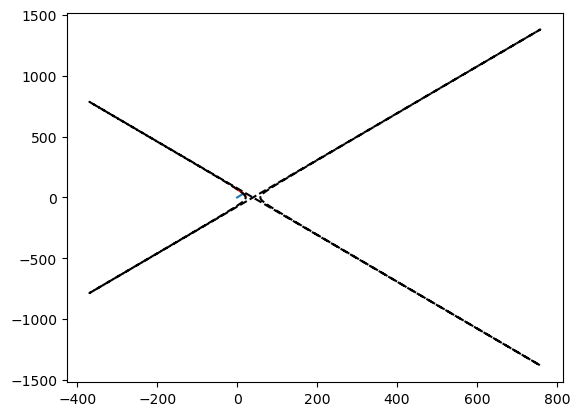

In [3]:
# mirror 2
print('M2');
f2,Rin2,din2,Rout2,dout2,w_out2,angle2,Theta_beam,Lambda=Quasi_Optics('M2.txt',size,'f2')
beta2,alpha2,e2,a2,b2,c2=Mirror(f2,Rin2,Rout2,angle2,Theta_beam,Size=size,Mirror_type='concave')
#Theta_beam*Rin2

In [4]:
#produce M1.txt
win1=w_out2;din1=169.438;angle1=90;f1=170
;
M1=np.array([['lambda',Lambda,''],
             ['W_in',win1,''],
             ['d_in',din1,''],
             ['angle',angle1,''],
             #['d_out',dout1,'']])
             ['f',f1,'']])
np.savetxt('M1.txt',M1,delimiter=",",fmt='%s')

M1
win: 2.7433005371299104
half axis of mirror: 50.41757558325744
Rin: 172.6323691953813 
 dout: 140.0094193072804 
 wout: 20.039997738068436 
 Rout: 11148.703158625072 
 dout: 140.0094193072804 

phi_0: 89.11287298590774
p 170.0
e: 0.9848696398237212 
 a: 5660.667763910227 
 b: 980.9757998364377 
 c: 5575.019821804015


20.262676952198436

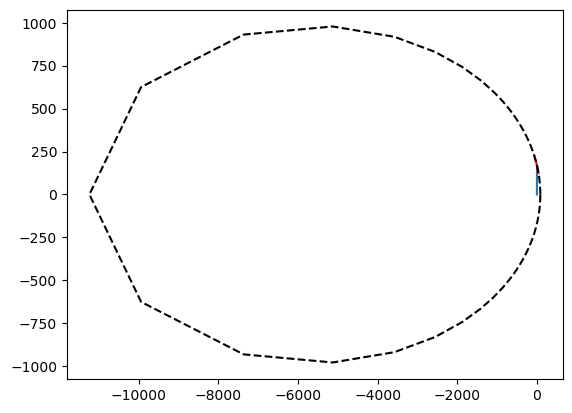

In [5]:
print('M1');
f1,Rin1,din1,Rout1,dout1,w_out1,angle1,Theta_beam,Lambda=Quasi_Optics('M1.txt',size,'f2')
beta1,alpha1,e1,a1,b1,c1=Ellips(f1,Rin1,Rout1,angle1,Theta_beam,Size=size)
center_projector(beta1,alpha1,e1,a1,c1)
Theta_beam*Rin1

In [6]:
'''
produce coordinate frame of concave case;
1. A2 coordinate M2 (Z,X);
2. rim x0, y_axis, x_axis;
3. origin of m1 coordinate and rotation anglu;
4. 
'''

A2=0-np.arccos(-(Rout2**2-4*c2**2-Rin2**2)/(4*c2*Rin2));
print('Rotation of M2 coord z:',np.cos(A2));
print('Rotation of M2 coord x:',np.sin(A2));

x0,y_axis,x_axis=center_projector(A2,alpha2,e2,a2,c2)
print('x0:',x0);
print('y_axis:',y_axis);
print('x_axis:',x_axis);

print('m1 origin coord system z:',Rin2+(Rin1-(din1+dout2))*np.cos(angle2/180*np.pi));
print('m1 origin coord system x:',0-(Rin1-(din1+dout2))*np.sin(angle2/180*np.pi))



print('rotation of m1 coord z:',np.cos(-angle2/180*np.pi));
print('rotation of m1 coord x:',np.sin(-angle2/180*np.pi));

A1=np.arccos(-(Rout1**2-4*c1**2-Rin1**2)/(4*c1*Rin1));
print('roation angul of surface m1:',-A1*180/np.pi)

Rotation of M2 coord z: 0.437404117484204
Rotation of M2 coord x: -0.8992650543682128
x0: 51.041681322095265
y_axis: 24.930355968316643
x_axis: 38.57760041449525
m1 origin coord system z: 34.82550476146321
m1 origin coord system x: -66.20247054109214
rotation of m1 coord z: 6.123233995736766e-17
rotation of m1 coord x: -1.0
roation angul of surface m1: -89.11287298590774


In [71]:
2*a1

11321.335527820454

In [72]:
2*c1

11150.03964360803

In [ ]:
Rin2-din2

In [ ]:
2*a1

In [ ]:
Rin1

In [ ]:
Rout1

In [ ]:
162+19

In [ ]:
-Rout2*np.cos(np.pi/4)+Rin2

In [ ]:
Rout2*np.sin(np.pi/4)

In [ ]:
180-50.42190848345773

In [ ]:
a2*2

In [ ]:
dout1

In [ ]:
A2/np.pi*180

In [ ]:
5/180*np.pi

In [ ]:
Lambda/1.4/np.pi*180/np.pi

In [ ]:
20*np.log10(np.exp(-1))

In [1]:
a={'a':1,'b':2}

In [2]:
a

{'a': 1, 'b': 2}

In [3]:
a['a']

1

In [5]:
a.keys()

dict_keys(['a', 'b'])